# Выбор региона для разработки новых нефтяных месторождений

* Цель исследования - определение перспективного региона для разработки месторождений
* Данные на которых проводится исследование предоставлены нефтедобывающей компанией. Признаки обезличены
* Данное исследование может быть полезно для оценки прибыли и рисков разработки новых месторождений

Автор: Крутиков Дмитрий
- задача модели - предсказать объём сырья по предоставленным исследователями признакам
- задача исследования - по предсказаниям модели оценить риски и прибыль методом Bootstrap


# Оглавление <a id='start'></a>
   *(кликабельное)* 
1. [Загрузка и подготовка данных](#chapter1)
    1. [Загрузка библиотек  и данных](#chapter1.A)
    2. [Исследование данных](#chapter1.B)
    3. [Подготовка данных](#chapter1.С)
    4. [Вывод о загрузке и подготовке данных](#chapter1.D)
2. [Обучение и проверка модели](#chapter2)
    1. [Обучение моделей для регионов](#chapter2.A)
    2. [Анализ результатов](#chapter2.B)
3. [Подготовка к расчёту прибыли](#chapter3)
4. [Расчёт прибыли и рисков](#chapter4)
5. [Заключение](#chapter5)

# 1. Загрузка и подготовка данных <a id='chapter1'></a>

### 1.A Загрузка библиотек  и данных <a id='chapter1.A'></a>

In [2]:
# Импортирую необходимые библиотеки
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
# model = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid') # Задаю стиль граффического отбражения данных
sb.set_context('notebook') # Задаю стиль граффического отбражения данных

In [3]:
# Загружаю данные
gd_0= pd.read_csv('geo_data_0.csv')
gd_1= pd.read_csv('geo_data_1.csv')
gd_2= pd.read_csv('geo_data_2.csv')
gd_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Далее по тексту буду называть все три региона нулевым, первым и вторым соответсвенно. 

### 1.B Исследование данных <a id='chapter1.B'></a>

In [4]:
print(gd_0.info())
print(gd_1.info())
print(gd_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory 

#### Пропусков не обнаруженно и преобразование типов не требуется.

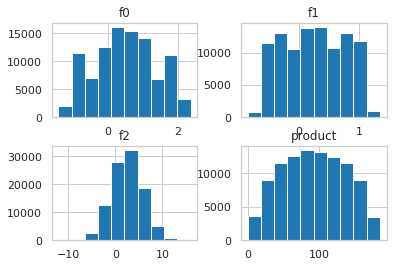

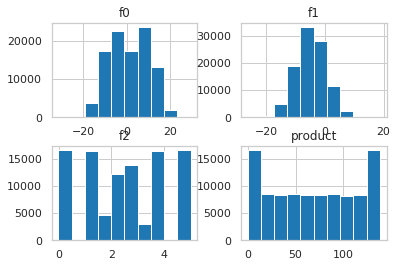

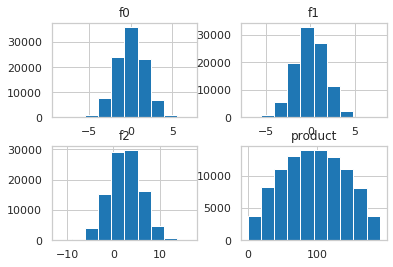

In [5]:
gd_0.hist()
(gd_1.hist())
(gd_2.hist())
plt.show()

#### Выбросов не обнаруженно. Но распределения для первого региона `geo_data_1 `(второго сверху) далеки от нормальных.

In [6]:
print(gd_0.duplicated().sum())
print(gd_1.duplicated().sum())
print(gd_2.duplicated().sum())

0
0
0


#### Дубликатов не обнаруженно

### Вывод 
* Датасет заранее предобработан на предмет пропусков, выбросов, типов данных и масштабирования. 
* Распределения для первого региона далеки от нормальных.



### 1.С Подготовка данных <a id='chapter1.С'></a>

In [7]:
gd_0_train, gd_0_valid = train_test_split(gd_0, test_size=0.25, random_state=12345)

features_train_0 = gd_0_train.drop(['product','id'], axis=1)
target_train_0 = gd_0_train['product']
print(features_train_0.shape,target_train_0.shape)
features_valid_0 = gd_0_valid.drop(['product','id'], axis=1)
target_valid_0 = gd_0_valid['product']
print(features_valid_0.shape,target_valid_0.shape)
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

(75000, 3) (75000,)
(25000, 3) (25000,)


In [8]:
gd_1_train, gd_1_valid = train_test_split(gd_1, test_size=0.25, random_state=12345)

features_train_1 = gd_1_train.drop(['product','id'], axis=1)
target_train_1 = gd_1_train['product']
print(features_train_1.shape,target_train_1.shape)

features_valid_1 = gd_1_valid.drop(['product','id'], axis=1)
target_valid_1 = gd_1_valid['product']
print(features_valid_1.shape,target_valid_1.shape)

scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

(75000, 3) (75000,)
(25000, 3) (25000,)


In [9]:
gd_2_train, gd_2_valid = train_test_split(gd_2, test_size=0.25, random_state=12345)

features_train_2 = gd_2_train.drop(['product','id'], axis=1)
target_train_2 = gd_2_train['product']
print(features_train_2.shape,target_train_2.shape)

features_valid_2 = gd_2_valid.drop(['product','id'], axis=1)
target_valid_2 = gd_2_valid['product']
print(features_valid_2.shape,target_valid_2.shape)

scaler = StandardScaler()
scaler.fit(features_train_2)
features_train_2 = scaler.transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2)

(75000, 3) (75000,)
(25000, 3) (25000,)


## Вывод о загрузке и подготовке данных
<a id='chapter1.D'></a>
* Библиотеки и данные загружены
* Изучены данные и их распределения
    - Датасет заранее предобратан до загрузки в проект:
        - Выбросов нет
        - Дубликатов нет
        - Пропущенных значений нет
    - Распределения по первому региону далеки от нормальных в отличии от остальных
* Подготовленны данные 
    - разделены на обучающую и валидационную выборки в соотношении 75:25
    - удален признак id как лишний для задач регресии
    - для каждого региона подготовлены признаки и также целевой признак
    
        - Признаки `f1`,`f2`,`f3` промасштабированны
    
[К оглавлению](#start)

# 2. Обучение и проверка модели <a id='chapter2'></a>

### 2.A Обучение моделей для регионов   <a id='chapter2.A'></a>

In [10]:
# обучение модели для нулевого региона
model_0 = LinearRegression()
model_0.fit(features_train_0,target_train_0) 
predictions_valid_0 = model_0.predict(features_valid_0)
pred_0=pd.Series(predictions_valid_0,index = target_valid_0.index)

In [11]:
# обучение модели для первого региона
model_1 = LinearRegression()
model_1.fit(features_train_1,target_train_1) 
predictions_valid_1 = model_1.predict(features_valid_1)
pred_1=pd.Series(predictions_valid_1,index = target_valid_1.index)

In [12]:
# обучение модели для второго региона
model_2 = LinearRegression()
model_2.fit(features_train_2,target_train_2) 
predictions_valid_2 = model_2.predict(features_valid_2)
pred_2=pd.Series(predictions_valid_2)
pred_2=pd.Series(predictions_valid_2,index = target_valid_2.index)

### 2.B Анализ результатов <a id='chapter2.B'></a>

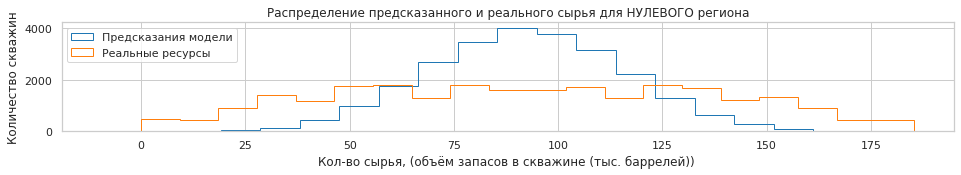

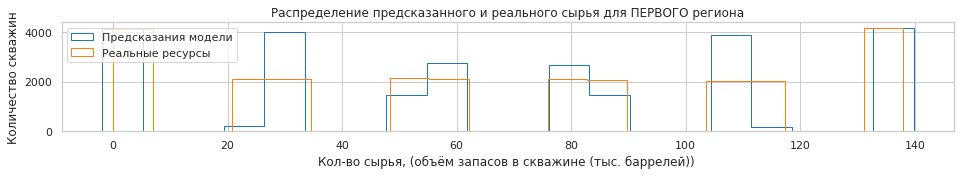

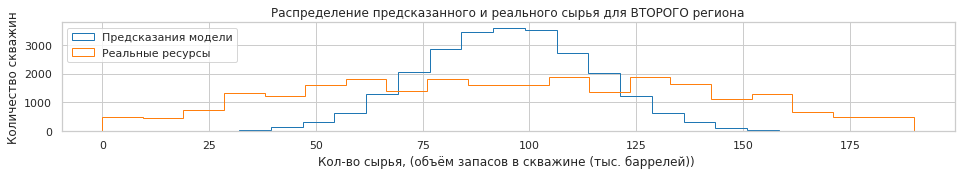

Для региона _0:
 Средний запас предсказанного сырья =  92.59256778438038 
Стандартное отклонение  предсказаного сырья =  23.176993954829868 
RMSE =  37.5794217150813 
R2 =  -1.6290772227285975
Для региона _0:
 Средний запас реального сырья =  92.07859674082927 
Стандартное отклонение =  44.286912625663646

Для региона _1:
 Средний запас предсказанного сырья =  68.728546895446 
Стандартное отклонение  предсказаного сырья =  46.01022483237712 
RMSE =  0.8930992867756158 
R2 =  0.9996232023840883
Для региона _1:
 Средний запас реального сырья =  68.72313602435997 
Стандартное отклонение =  46.02216537514022

Для региона _2:
 Средний запас предсказанного сырья =  94.96504596800489 
Стандартное отклонение  предсказаного сырья =  19.853733182632897 
RMSE =  40.02970873393434 
R2=  -3.0653493332989035
Для региона _2:
 Средний запас реального сырья =  94.88423280885438 
Стандартное отклонение =  44.90298244552798


,region,pred_product_mean,real_product_mean,pred_product_std,real_product_std,RMSE,R2
0,gd1,92.592568,92.078597,23.176994,44.286913,37.579422,-1.629077
1,gd2,68.728547,68.723136,46.010225,46.022165,0.893099,0.999623
2,gd2,94.965046,94.884233,19.853733,44.902982,40.029709,-3.065349


In [13]:
# Оценю работу модели, взглянув на распределения предсказаного целевого признака по регионам
plt.figure(figsize=(16,2))
plt.hist(pred_0 , label="Предсказания модели", histtype = 'step' , bins = 20 )
plt.hist(target_valid_0 , label="Реальные ресурсы", histtype = 'step' , bins = 20)
plt.title("Распределение предсказанного и реального сырья для НУЛЕВОГО региона")
plt.xlabel("Кол-во сырья, (объём запасов в скважине (тыс. баррелей)) ")
plt.ylabel("Количество скважин")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,2))
plt.hist(pred_1 , label="Предсказания модели", histtype = 'step' , bins = 20)
plt.hist(target_valid_1 , label="Реальные ресурсы", histtype = 'step' , bins = 20)
plt.title("Распределение предсказанного и реального сырья для ПЕРВОГО региона")
plt.xlabel("Кол-во сырья, (объём запасов в скважине (тыс. баррелей)) ")
plt.ylabel("Количество скважин")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,2))
plt.hist(pred_2 , label="Предсказания модели", histtype = 'step' , bins = 20)
plt.hist(target_valid_2 , label="Реальные ресурсы", histtype = 'step' , bins = 20)
plt.title("Распределение предсказанного и реального сырья для ВТОРОГО региона")
plt.xlabel("Кол-во сырья, (объём запасов в скважине (тыс. баррелей)) ")
plt.ylabel("Количество скважин")
plt.legend(loc='upper left')
plt.show()
#  Напечатаю на экране средний запас предсказанного сырья и RMSE модели.
print(
    'Для региона _0:\n','Средний запас предсказанного сырья = ', pred_0.mean(),
    '\nСтандартное отклонение  предсказаного сырья = ' ,pred_0.std(),
    '\nRMSE = ' ,mean_squared_error(pred_0,target_valid_0)**0.5,
    '\nR2 = ' ,r2_score(pred_0,target_valid_0)
)
print('Для региона _0:\n','Средний запас реального сырья = ', target_valid_0.mean(),'\nСтандартное отклонение = ' ,target_valid_0.std())

print(
    '\nДля региона _1:\n','Средний запас предсказанного сырья = ', pred_1.mean(),
    '\nСтандартное отклонение  предсказаного сырья = ' ,pred_1.std(),
    '\nRMSE = ' ,mean_squared_error(pred_1,target_valid_1)**0.5,
    '\nR2 = ' ,r2_score(pred_1,target_valid_1)
)
print('Для региона _1:\n','Средний запас реального сырья = ', target_valid_1.mean(),'\nСтандартное отклонение = ' ,target_valid_1.std())

print(
    '\nДля региона _2:\n','Средний запас предсказанного сырья = ', pred_2.mean(),
    '\nСтандартное отклонение  предсказаного сырья = ' ,pred_2.std(),
    '\nRMSE = ' ,mean_squared_error(pred_2,target_valid_2)**0.5,
    '\nR2= ' ,r2_score(pred_2,target_valid_2)
)
print('Для региона _2:\n','Средний запас реального сырья = ', target_valid_2.mean(),'\nСтандартное отклонение = ' ,target_valid_2.std())

models = pd.DataFrame(columns = [
    'region','pred_product_mean','real_product_mean','pred_product_std','real_product_std','RMSE','R2'] ) 
models['region'] = ['gd1','gd2','gd2']
models['pred_product_mean'] = [pred_0.mean(),pred_1.mean(),pred_2.mean()]
models['real_product_mean'] = [target_valid_0.mean(),target_valid_1.mean(),target_valid_2.mean()]
models['pred_product_std'] = [ pred_0.std() , pred_1.std() , pred_2.std() ]
models['real_product_std'] = [ target_valid_0.std() , target_valid_1.std() , target_valid_2.std() ]
models['RMSE'] = [ mean_squared_error(pred_0,target_valid_0)**0.5 , mean_squared_error(pred_1,target_valid_1)**0.5 , mean_squared_error(pred_2,target_valid_2)**0.5 ]
models['R2'] = [ r2_score(pred_0,target_valid_0), r2_score(pred_1,target_valid_1) , r2_score(pred_2,target_valid_2)]
models

### Вывод об обученных моделях
* Очевидно, что модели неидеально предсказывает целевой признак во всех регионах(*под идеальным предсказанием я имел ввиду что они повторят распределение ответов*)
    - в основном модели чаще попадают в средние значения по выборкам 
    - Для нулевого и второго региона качество модели крайне низкое. R2 метрика для них ниже нуля. А для первого близка к 1 что говорит что модель высокого качества
* В первом регионе **1.3 раза** меньше *средний запас сырья* чем в нулевом и втором по предсказанию модели, и *rmse* так же меньше на **2 порядка**. 

* Несмотря на достаточно низкое качество моделей буду использовать их предсказания для расчёта прибыли. 


[К оглавлению](#start)

# 3. Подготовка к расчёту прибыли <a id='chapter3'></a>

 Рассчитаю достаточный объём сырья для безубыточной разработки новой скважины. Сравню полученный объём сырья со средним запасом в каждом регионе.

* При разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [14]:
BUDGET_FOR_REGION = 10**7# [тыс. рублей]. Бюджет на регион.
CASH_PER_THOUSAND_BARRELS = 450 # [тыс. рублей]. Выручка с одной еденицы продукта(одной тысячи баррелей)
required_volume_of_production = BUDGET_FOR_REGION / CASH_PER_THOUSAND_BARRELS # достаточный объём для продукции, чтобы выйти в плюс надо добыть больше
min_thousand_barrels_for_borehole = required_volume_of_production / 200 # достаточный обьём для безубыточной разработки новой скважины 
mean_product_reserve_in_borehole_0 = gd_0['product'].mean() # Средний запас в нулевом регионе
mean_product_reserve_in_borehole_1 = gd_1['product'].mean() # Средний запас в первом регионе
mean_product_reserve_in_borehole_2 = gd_2['product'].mean() # Средний запас в втором регионе
print('Достаточный объём сырья \nдля безубыточной разработки новой скважины = ' ,
int(min_thousand_barrels_for_borehole), '[тыс. баррелей]' ,
'\nСредний запас в нулевом регионе = ',      
int(mean_product_reserve_in_borehole_0), '[тыс. баррелей]' ,
'\nСредний запас в первом регионе = ',
int(mean_product_reserve_in_borehole_1), '[тыс. баррелей]' ,
'\nСредний запас в втором регионе = ',
int(mean_product_reserve_in_borehole_2), '[тыс. баррелей]' 
)

Достаточный объём сырья 
для безубыточной разработки новой скважины =  111 [тыс. баррелей] 
Средний запас в нулевом регионе =  92 [тыс. баррелей] 
Средний запас в первом регионе =  68 [тыс. баррелей] 
Средний запас в втором регионе =  95 [тыс. баррелей]


###  Вывод о подготовке к расчёту прибыли
* Во всех регионах средниий запас больше достачтоного объёма для безубыточной разработки в 9 раз для нулевого и второго и в 6 раз для первого. 

1. Выберу скважины с максимальными значениями предсказаний.Количество скважин зависит от бюджета компании и стоимости разработки одной скважины.
2. Просуммирую целевое значение объёма сырья, соответствующее этим предсказаниям.
3. Рассчитаю прибыль для полученного объёма сырья.

In [15]:
# функция для расчёта чистой прибыли 
def best_profit(boreholes,target,choice):
    boreholes_sort = boreholes.sort_values( ascending = choice ).head(200)
    boreholes_sort_index = boreholes_sort.index
    ans = int((target[boreholes_sort_index]*CASH_PER_THOUSAND_BARRELS).sum()-BUDGET_FOR_REGION)
    return ans

- 1 функция для подсчёта прибыли

[К оглавлению](#start)

# 4. Расчёт прибыли и рисков <a id='chapter4'></a>

Бюджет =  10000000 [тыс. рублей]

Средняя чистая прибыль региона_0: 592527 [тыс. рублей]
Бюджет окупится в 0.0592527435 раз
2.5%-квантиль региона_0: -26535
97.5%-квантиль региона_0: 1228537

Средняя чистая прибыль региона_1: 662164 [тыс. рублей]
Бюджет окупится в 0.066216471 раз
2.5%-квантиль региона_1: 159532
97.5%-квантиль региона_1: 1220466

Средняя чистая прибыль региона_2: 586002 [тыс. рублей]
Бюджет окупится в 0.0586002412 раз
2.5%-квантиль региона_2: -43236
97.5%-квантиль региона_2: 1240232
Риск убытков в регионах:
 Нулевой регион  =  3.1 % Перый регион  =  0.2 % Второй регион =  3.1 %


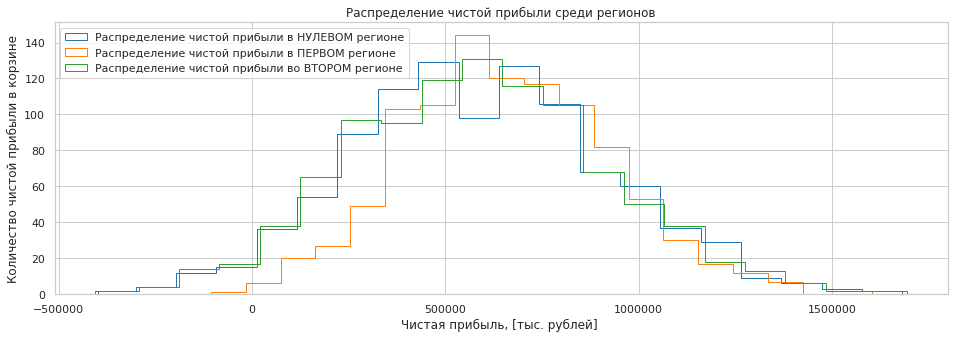

In [20]:
state = np.random.RandomState(12345)
    
values_0 = []
count_0 = 0
values_1 = []
count_1 = 0
values_2 = []
count_2 = 0

choice = False # false-выбор лучших скважин, True - худших
for i in range(1000):
    
    sample_0_p = pred_0.sample(n=500, replace=True, random_state=state)
    sample_0_r = target_valid_0.loc[sample_0_p.index]
    
    sample_1_p = pred_1.sample(n=500, replace=True, random_state=state)
    sample_1_r = target_valid_1.loc[sample_1_p.index]
    
    sample_2_p = pred_2.sample(n=500, replace=True, random_state=state)
    sample_2_r = target_valid_2.loc[sample_2_p.index]
    
    ap_0 = best_profit(sample_0_p,sample_0_r,choice)
    if ap_0 < 0 :
        count_0+=1
    values_0.append(ap_0)
    
    ap_1 = best_profit(sample_1_p,sample_1_r,choice)
    if ap_1 < 0 :
        count_1+=1
    values_1.append(ap_1)
    
    ap_2 = best_profit(sample_2_p,sample_2_r,choice)
    if ap_2 < 0 :
        count_2+=1
    values_2.append(ap_2)
    
values_0 = pd.Series(values_0)
values_1 = pd.Series(values_1)
values_2 = pd.Series(values_2)

lower_0 = values_0.quantile(0.025)
upper_0 = values_0.quantile(0.975)
mean_0 = values_0.mean()

lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)
mean_1 = values_1.mean()

lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)
mean_2 = values_2.mean()
print("Бюджет = ",BUDGET_FOR_REGION,'[тыс. рублей]')

print("\nСредняя чистая прибыль региона_0:", int(mean_0),"[тыс. рублей]")
print("Бюджет окупится в", (mean_0/BUDGET_FOR_REGION),'раз')
print("2.5%-квантиль региона_0:", int(lower_0))
print("97.5%-квантиль региона_0:",int(upper_0))

print("\nСредняя чистая прибыль региона_1:", int(mean_1),'[тыс. рублей]')
print("Бюджет окупится в", (mean_1/BUDGET_FOR_REGION),'раз')
print("2.5%-квантиль региона_1:", int(lower_1))
print("97.5%-квантиль региона_1:", int(upper_1))

print("\nСредняя чистая прибыль региона_2:", int(mean_2),'[тыс. рублей]')
print("Бюджет окупится в", (mean_2/BUDGET_FOR_REGION),'раз')
print("2.5%-квантиль региона_2:", int(lower_2))
print("97.5%-квантиль региона_2:", int(upper_2))

print('Риск убытков в регионах:\n',
     'Нулевой регион  = ', count_0/10,'%',
     'Перый регион  = ' , count_1/10,'%',
     'Второй регион = ' , count_2/10,'%'
     )

plt.figure(figsize=(16,5))
plt.hist(values_0 , label="Распределение чистой прибыли в НУЛЕВОМ регионе", histtype = 'step', bins = 20 )
plt.hist(values_1 , label="Распределение чистой прибыли в ПЕРВОМ регионе", histtype = 'step', bins = 20 )
plt.hist(values_2 , label="Распределение чистой прибыли во ВТОРОМ регионе", histtype = 'step', bins = 20 )

plt.title("Распределение чистой прибыли среди регионов")
plt.xlabel("Чистая прибыль, [тыс. рублей] ")
plt.ylabel("Количество чистой прибыли в корзине")
plt.legend(loc='upper left')
plt.show()



### Выбор региона
1.  Оставить только те регионы в которых вероятность убытков  меньше 2,5%. 
    - Моя функция считает чистую прибыль, то есть доход минус бюджет. Судя по распределению ни в одном регионе при таком способе добычи, оптимальном выборе и бюджете - убытков не наблюдается. 2,5% квантиль(или перцентиль) у всех регионов минимум в 8 раз превышает бюджет.
        - Значит оставляем все регионы.
2. Выбираем регион с наибольшей чистой прибылью, это ПЕРВЫЙ регион.

#  Заключение <a id='chapter5'></a>
- Наибольшая средняя выручка оцененная по предсказаниям моделей среди регионов оказалась у ПЕРВОГО региона. Исходя из этого стоит рекомендовать первый регион для дальнейшей разработки. 


[К оглавлению](#start)